<h2>Model GARCH </h2>
$$r_{t} = \mu + \epsilon_{t}$$
$$\sigma^2_{t} = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma^{2}_{t-1}$$
$$\epsilon_{t} = \sigma_{t} e_{t} \text{,} \quad e_{t} \sim N(0,1) $$

In [1]:
import pandas_datareader.data as web

In [2]:
import datetime as dt
import arch.data.sp500

In [3]:
st = dt.datetime(1988,1,1)
en = dt.datetime(2018,1,1)
#data = web.get_data_yahoo('^GSPC', start=st, end=en)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * data['Adj Close'].pct_change().dropna()

In [4]:
from arch import arch_model
am = arch_model(returns)
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.280378265095
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477483569
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476989043
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


In [5]:
res.params

mu          0.056353
omega       0.017507
alpha[1]    0.102150
beta[1]     0.885206
Name: params, dtype: float64

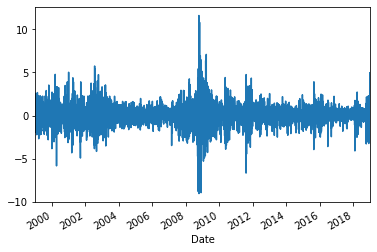

In [6]:
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [7]:
res.model

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x1f83feb1c70

                         Constant Mean - GARCH Model Results                         
Dep. Variable:                     Adj Close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                             GARCH   Log-Likelihood:               -6979.65
Distribution:                         Normal   AIC:                           13967.3
Method:            User-specified Parameters   BIC:                           13993.4
                                               No. Observations:                 5030
Date:                       Mon, Apr 05 2021                                         
Time:                               20:42:20                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
beta[1]        0.9382

Resul

(10596.0, 17896.0)

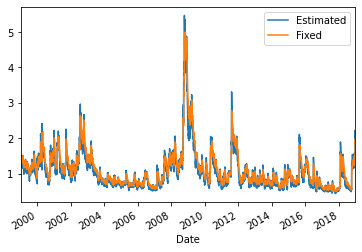

In [8]:
import pandas as pd



fixed_res = am.fix([0.0235, 0.01, 0.06, 0.9382])
print(fixed_res.summary())


df = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], 1)
df.columns = ["Estimated", "Fixed"]
subplot = df.plot()
subplot.set_xlim(xlim)

In [9]:
res.conditional_volatility

Date
1999-01-05    1.344903
1999-01-06    1.338566
1999-01-07    1.441927
1999-01-08    1.365639
1999-01-11    1.296941
                ...   
2018-12-24    1.501101
2018-12-26    1.671694
2018-12-27    2.224166
2018-12-28    2.112322
2018-12-31    1.992621
Name: cond_vol, Length: 5030, dtype: float64

In [10]:
type(res.conditional_volatility)

pandas.core.series.Series

In [11]:
import matplotlib.pyplot as plt

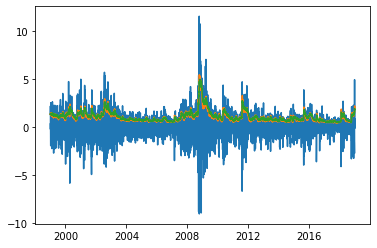

In [12]:
plt.plot(returns)
#subplot = df.plot()
#subplot.set_xlim(xlim)
plt.plot(df.Estimated)
plt.plot(df.Fixed)

In [15]:
res.resid

Date
1999-01-05    1.301847
1999-01-06    2.157688
1999-01-07   -0.261486
1999-01-08    0.365783
1999-01-11   -0.935504
                ...   
2018-12-24   -2.767578
2018-12-26    4.903021
2018-12-27    0.799915
2018-12-28   -0.180511
2018-12-31    0.792895
Name: resid, Length: 5030, dtype: float64

In [28]:
res.model.forecast(res.params).mean

,h.1
Date,
1999-01-05,NaN
1999-01-06,NaN
1999-01-07,NaN
1999-01-08,NaN
1999-01-11,NaN
...,...
2018-12-24,NaN
2018-12-26,NaN
2018-12-27,NaN


In [30]:
res.model.forecast(res.params).variance

,h.1
Date,
1999-01-05,NaN
1999-01-06,NaN
1999-01-07,NaN
1999-01-08,NaN
1999-01-11,NaN
...,...
2018-12-24,NaN
2018-12-26,NaN
2018-12-27,NaN
